In [1]:
# Load libraries
import pandas
#import numpy
from sklearn import metrics
#from keras.utils import np_utils
#from keras.utils import to_categorical
from sklearn.preprocessing import minmax_scale
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import tree

import pandas as pd
import numpy as np

from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)

In [3]:
# Load dataset
url = "allUsers.lcl.csv"
df = pandas.read_csv(url)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
Class    78096 non-null int64
User     78096 non-null int64
X0       78096 non-null float64
Y0       78096 non-null float64
Z0       78096 non-null float64
X1       78096 non-null float64
Y1       78096 non-null float64
Z1       78096 non-null float64
X2       78096 non-null float64
Y2       78096 non-null float64
Z2       78096 non-null float64
X3       78096 non-null object
Y3       78096 non-null object
Z3       78096 non-null object
X4       78096 non-null object
Y4       78096 non-null object
Z4       78096 non-null object
X5       78096 non-null object
Y5       78096 non-null object
Z5       78096 non-null object
X6       78096 non-null object
Y6       78096 non-null object
Z6       78096 non-null object
X7       78096 non-null object
Y7       78096 non-null object
Z7       78096 non-null object
X8       78096 non-null object
Y8       78096 non-null object
Z8       78096 n

In [5]:
#
for val in list(df.columns.values):
    df[val] = pandas.to_numeric(df[val], errors='coerce')

In [6]:
#fill missing data
df=df.fillna(df.mean())

In [7]:
print(df.isnull().sum())
print(df.describe())

Class    0
User     0
X0       0
Y0       0
Z0       0
X1       0
Y1       0
Z1       0
X2       0
Y2       0
Z2       0
X3       0
Y3       0
Z3       0
X4       0
Y4       0
Z4       0
X5       0
Y5       0
Z5       0
X6       0
Y6       0
Z6       0
X7       0
Y7       0
Z7       0
X8       0
Y8       0
Z8       0
X9       0
Y9       0
Z9       0
X10      0
Y10      0
Z10      0
X11      0
Y11      0
Z11      0
dtype: int64
              Class          User            X0            Y0            Z0  \
count  78096.000000  78096.000000  78096.000000  78096.000000  78096.000000   
mean       2.983738      7.959127     50.345664     85.812051    -29.984712   
std        1.421183      4.697810     32.696173     40.204363     34.361918   
min        0.000000      0.000000   -108.552738    -98.233756   -126.770872   
25%        2.000000      5.000000     29.295062     63.494432    -56.356438   
50%        3.000000      9.000000     54.619964     86.526246    -30.864125   
75%        4.000

In [8]:
#keep only first class
df=df.loc[df['Class'] == 1]
df=df.drop(['Class'], axis=1)

In [9]:
#normalize data
listValuesToNormalize=list(df.columns.values)
listValuesToNormalize.remove('User')
listValuesToNormalize
df[listValuesToNormalize] = minmax_scale(df[listValuesToNormalize])

In [10]:
#get dataset (split it in input/output)
dataset = df.values
print dataset

[[ 0.          0.4630671   0.67308287 ...  0.          0.
   0.        ]
 [ 0.          0.47202038  0.67625524 ...  0.          0.
   0.        ]
 [ 0.          0.46934022  0.67705824 ...  0.          0.
   0.        ]
 ...
 [14.          0.52726309  0.63144282 ...  0.          0.
   0.        ]
 [14.          0.44842303  0.80609502 ...  0.          0.
   0.        ]
 [14.          0.32537147  0.95858734 ...  0.          0.
   0.        ]]


In [11]:
result = np.array(dataset)

In [12]:
result
dataset = result

In [13]:
dataset

array([[ 0.        ,  0.4630671 ,  0.67308287, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.47202038,  0.67625524, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.46934022,  0.67705824, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [14.        ,  0.52726309,  0.63144282, ...,  0.        ,
         0.        ,  0.        ],
       [14.        ,  0.44842303,  0.80609502, ...,  0.        ,
         0.        ,  0.        ],
       [14.        ,  0.32537147,  0.95858734, ...,  0.        ,
         0.        ,  0.        ]])

In [14]:
X = dataset[:,1:].astype(float)
Y = dataset[:,0].astype(int)

In [15]:
# convert integers to  one hot encoded
hot_encoded_y = np_utils.to_categorical(Y)

In [16]:
X

array([[0.4630671 , 0.67308287, 0.30192616, ..., 0.        , 0.        ,
        0.        ],
       [0.47202038, 0.67625524, 0.3159227 , ..., 0.        , 0.        ,
        0.        ],
       [0.46934022, 0.67705824, 0.31286492, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.52726309, 0.63144282, 0.39851026, ..., 0.        , 0.        ,
        0.        ],
       [0.44842303, 0.80609502, 0.54878004, ..., 0.        , 0.        ,
        0.        ],
       [0.32537147, 0.95858734, 0.78737642, ..., 0.        , 0.        ,
        0.        ]])

In [17]:
#split 0.8/0.2
X_train, X_test, y_train, y_test = train_test_split(X, hot_encoded_y, test_size=0.2, random_state=seed)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed)

In [19]:
print("the dataset has "+str(X.shape[0])+ "samples that are splitted in:")
print("- "+str(X_train.shape[0])+"samples (training set)" )
print("- "+str(X_val.shape[0])+"samples (validation set)")
print("- "+str(X_test.shape[0])+"samples (test set)")

the dataset has 16265samples that are splitted in:
- 9759samples (training set)
- 3253samples (validation set)
- 3253samples (test set)


In [20]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

('Accuracy:', 0.9618813403012604)
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       377
           1       0.96      0.95      0.95       275
           2       0.96      0.95      0.95       234
           3       0.00      0.00      0.00         0
           4       0.36      0.57      0.44         7
           5       0.99      1.00      0.99       163
           6       0.96      0.95      0.95       138
           7       0.64      0.69      0.67        13
           8       0.94      0.96      0.95       210
           9       0.96      0.99      0.97       131
          10       0.98      0.97      0.97       483
          11       0.99      0.99      0.99       335
          12       0.94      0.89      0.91       150
          13       0.97      0.97      0.97       415
          14       0.98      0.95      0.97       322

   micro avg       0.96      0.96      0.96      3253
   macro avg       0.84      0.85      0.84   

/Users/shan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [21]:
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

[[367   2   2   0   0   2   0   0   2   1   0   0   1   0]
 [  1 260   4   1   0   0   0   0   0   0   0   4   2   3]
 [  9   0 222   0   0   0   2   1   0   0   0   0   0   0]
 [  1   0   0   4   0   0   1   0   0   0   0   0   1   0]
 [  0   0   0   0 163   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 131   1   1   1   1   1   1   1   0]
 [  0   0   1   1   0   0   9   0   0   0   0   0   2   0]
 [  0   0   1   1   1   1   0 201   0   3   0   1   0   1]
 [  1   0   0   0   0   0   0   0 130   0   0   0   0   0]
 [  5   0   0   0   0   1   0   7   2 467   0   0   0   1]
 [  2   0   0   0   1   0   0   1   0   0 331   0   0   0]
 [  1   4   1   1   0   1   1   1   0   0   0 134   4   2]
 [  5   3   1   1   0   0   0   0   1   1   0   0 403   0]
 [  2   1   0   2   0   1   0   1   0   2   3   3   0 307]]


In [22]:
#ROC 

In [23]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

('Accuracy', 0.964340608668921)


In [24]:
"""
from sklearn.metrics import roc_auc_score
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
#probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
"""

"\nfrom sklearn.metrics import roc_auc_score\n# predict probabilities\nprobs = clf.predict_proba(X_test)\n# keep probabilities for the positive outcome only\n#probs = probs[:, 1]\n# calculate AUC\nauc = roc_auc_score(y_test, probs)\nprint('AUC: %.3f' % auc)\n"

In [25]:
# ROC AUC
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

TypeError: list indices must be integers, not tuple

In [26]:
#K N N 

In [27]:
# Create Decision Tree classifer object
knn = KNeighborsClassifier(n_neighbors=3)
# Train Decision Tree Classifer
knn = knn.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = knn.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

('Accuracy:', 0.9406701506301876)
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       377
           1       0.94      0.96      0.95       275
           2       0.97      1.00      0.98       234
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         7
           5       0.99      1.00      1.00       163
           6       0.95      0.88      0.91       138
           7       0.75      0.23      0.35        13
           8       0.87      0.86      0.86       210
           9       0.98      0.98      0.98       131
          10       0.93      0.91      0.92       483
          11       0.96      1.00      0.98       335
          12       0.99      0.84      0.91       150
          13       0.90      0.98      0.94       415
          14       0.99      0.96      0.97       322

   micro avg       0.95      0.94      0.94      3253
   macro avg       0.81      0.77      0.78   

/Users/shan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [28]:
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

[[354   2   1   0   0   2   1   0   0   9   2   0   6   0]
 [  0 265   0   0   0   0   0   0   0   0   0   0   9   1]
 [  0   1 233   0   0   0   0   0   0   0   0   0   0   0]
 [  1   2   0   0   0   0   0   0   0   0   0   0   3   1]
 [  0   0   0   0 163   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0 121   0   0   0   1  12   0   1   0]
 [  0   2   0   1   0   3   3   0   0   0   0   0   4   0]
 [  5   1   1   0   0   1   0 181   0  20   0   0   0   1]
 [  0   0   0   0   0   0   0   0 128   3   0   0   0   0]
 [ 11   0   1   0   0   0   0  27   3 439   0   1   1   0]
 [  0   0   1   0   0   0   0   0   0   0 334   0   0   0]
 [  4   0   0   0   0   0   0   1   0   0   0 126  19   0]
 [  3   1   4   0   0   0   0   0   0   0   0   0 407   0]
 [  4   7   0   0   1   0   0   0   0   0   0   0   2 308]]


AUC: 0.895


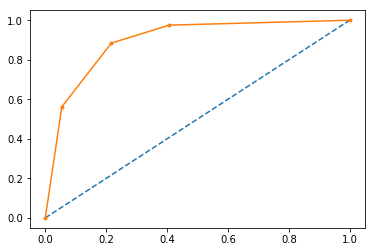

In [29]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a K N N model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(trainX, trainy)

# predict probabilities
probs = knn.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [30]:
# Logistic regression

In [43]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression classifer object
logreg = LogisticRegression()
# Train Logistic Regressio Classifer
logreg.fit(X_train,y_train)
#Predict the response for test dataset
y_pred=logreg.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))


('Accuracy:', 0.892)
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       112
           1       0.92      0.88      0.90       138

   micro avg       0.89      0.89      0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



In [44]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[101,  11],
       [ 16, 122]])

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

('Accuracy:', 0.892)
('Precision:', 0.9172932330827067)
('Recall:', 0.8840579710144928)


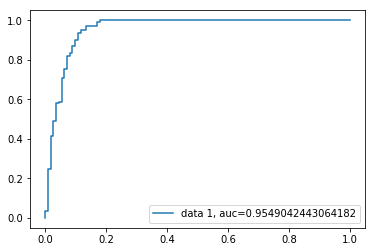

In [46]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [47]:
# SVM

In [48]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

('Accuracy:', 0.916)
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       112
           1       0.93      0.92      0.92       138

   micro avg       0.92      0.92      0.92       250
   macro avg       0.91      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

('Accuracy:', 0.916)
('Precision:', 0.927007299270073)
('Recall:', 0.9202898550724637)


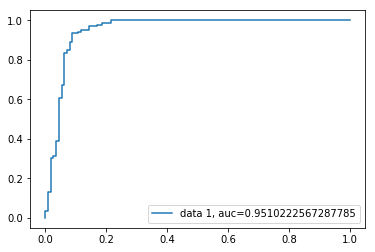

In [50]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [51]:
# AdaBoost

In [52]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))



('Accuracy:', 0.892)
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       112
           1       0.92      0.88      0.90       138

   micro avg       0.89      0.89      0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



In [53]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[101,  11],
       [ 16, 122]])

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

('Accuracy:', 0.892)
('Precision:', 0.9172932330827067)
('Recall:', 0.8840579710144928)


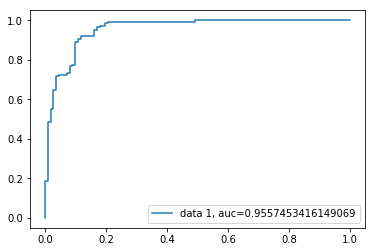

In [55]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [56]:
# Naive Bayes

In [57]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

('Accuracy:', 0.908)
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       112
           1       0.89      0.95      0.92       138

   micro avg       0.91      0.91      0.91       250
   macro avg       0.91      0.90      0.91       250
weighted avg       0.91      0.91      0.91       250



In [58]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 96,  16],
       [  7, 131]])

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

('Accuracy:', 0.908)
('Precision:', 0.891156462585034)
('Recall:', 0.9492753623188406)


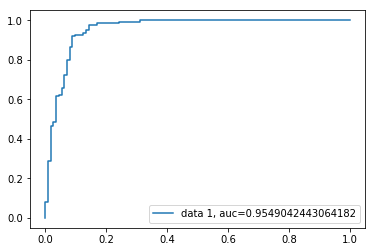

In [60]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [61]:
# Random Forest 

In [62]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

('Accuracy:', 0.908)
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       112
           1       0.91      0.93      0.92       138

   micro avg       0.91      0.91      0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [63]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 99,  13],
       [ 10, 128]])

In [64]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

('Accuracy:', 0.908)
('Precision:', 0.9078014184397163)
('Recall:', 0.927536231884058)


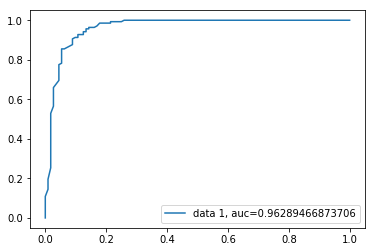

In [65]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [66]:
# Decision Tree

In [67]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt.predict(X_test)

y_pred=dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

('Accuracy:', 0.916)
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       112
           1       0.93      0.92      0.92       138

   micro avg       0.92      0.92      0.92       250
   macro avg       0.91      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [68]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[102,  10],
       [ 11, 127]])

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

('Accuracy:', 0.916)
('Precision:', 0.927007299270073)
('Recall:', 0.9202898550724637)


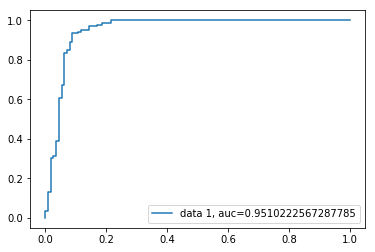

In [70]:
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [71]:
# K N N 

In [72]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

y_pred=knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

('Accuracy:', 0.884)
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       112
           1       0.89      0.91      0.90       138

   micro avg       0.88      0.88      0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



In [73]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 96,  16],
       [ 13, 125]])

In [74]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

('Accuracy:', 0.884)
('Precision:', 0.8865248226950354)
('Recall:', 0.9057971014492754)


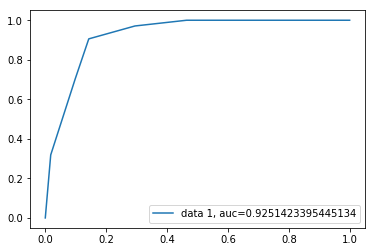

In [75]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()